# EDA

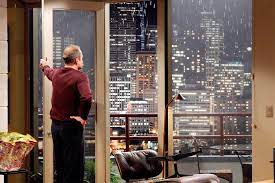

In [261]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [262]:
#import librarys
import pandas as pd
import psycopg2

#import dotenv
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)
#connect 
cur = conn.cursor()

#fetch sql data query, and join the data tables on the ID 
#either set Schema to EDA or use "eda."
#you could also do this 
#sql_query_fetch_all_data = """
 #   SELECT *
 #   FROM eda.king_county_house_details AS D
 #   JOIN eda.king_county_house_sales AS S
 #ON eda.D.id = eda.S.house_id;
# # Info 2: Better use LEFT JOIN next one, so no infos get lost !

sql_query_fetch_all_data = """
    SELECT *
    FROM eda.king_county_house_details
    JOIN eda.king_county_house_sales
    ON eda.king_county_house_details.id = eda.king_county_house_sales.house_id;
"""
cur.execute(sql_query_fetch_all_data)
cur.fetchall()

df_all = pd.read_sql(sql_query_fetch_all_data, conn)


#close the connection
conn.close()

df_all.to_csv('merged_data.csv',index=False)


In [263]:
df_all

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,2,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
2,3,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400
3,4,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875
4,5,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018
21593,21594,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120
21594,21595,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141
21595,21596,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100


In [264]:
# read working table into the dataframe
df_joined_table = pd.read_csv('merged_data.csv')
df_joined_table

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,2,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
2,3,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400
3,4,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875
4,5,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018
21593,21594,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120
21594,21595,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141
21595,21596,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100


In [265]:
#check of columns of both tables are the same
df_all.columns == df_joined_table.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

## The Tasks

* Create a new repo using this template.

* Through EDA/statistical analysis above please come up with AT LEAST 3 insights regarding the overall data. One should be geographical.

* In addition also come up with AT LEAST 3 recommendations for your client.

* Note, you can take either the perspective of a buyer or a seller. Choose a client from the list at the end of this file.

## The Deliverables

* New repository from template
* A well documented Jupyter Notebook (see here for an example) containing  the code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project. Do not push all the analysis... just the analysis that is relevant! You can start with the starter notebook.
* An updated and organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
* A short Keynote/PowerPoint/Google Slides/Jupyter slides presentation giving a high-level overview of your methodology and recommendations for non-technical clients. The duration of the presentation should be 10 minutes, then the discussion will continue for 5 minutes. Also put your slides (delivered as a PDF export) on Github to get a well-rounded project. Do not present using your jupyter notebook!
* Optional - A Python script for processing and cleaning your data, here feel free to write clean code, using functions and docstrings. Even more optional you can also do unit tests. If you do this part, you may also update your EDA notebook to make use of these functions. See (optional)[optional] folder for example.


## Client

Amy Williams:

* Seller
	
* Italian mafiosi
* Sells several central houses(top10%) over time
* needs average outskirt houses over time to hide from the FBI

In [266]:
df_joined_table

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,2,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
2,3,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400
3,4,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875
4,5,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018
21593,21594,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120
21594,21595,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141
21595,21596,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100


## Cleanup

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
dtype: int64

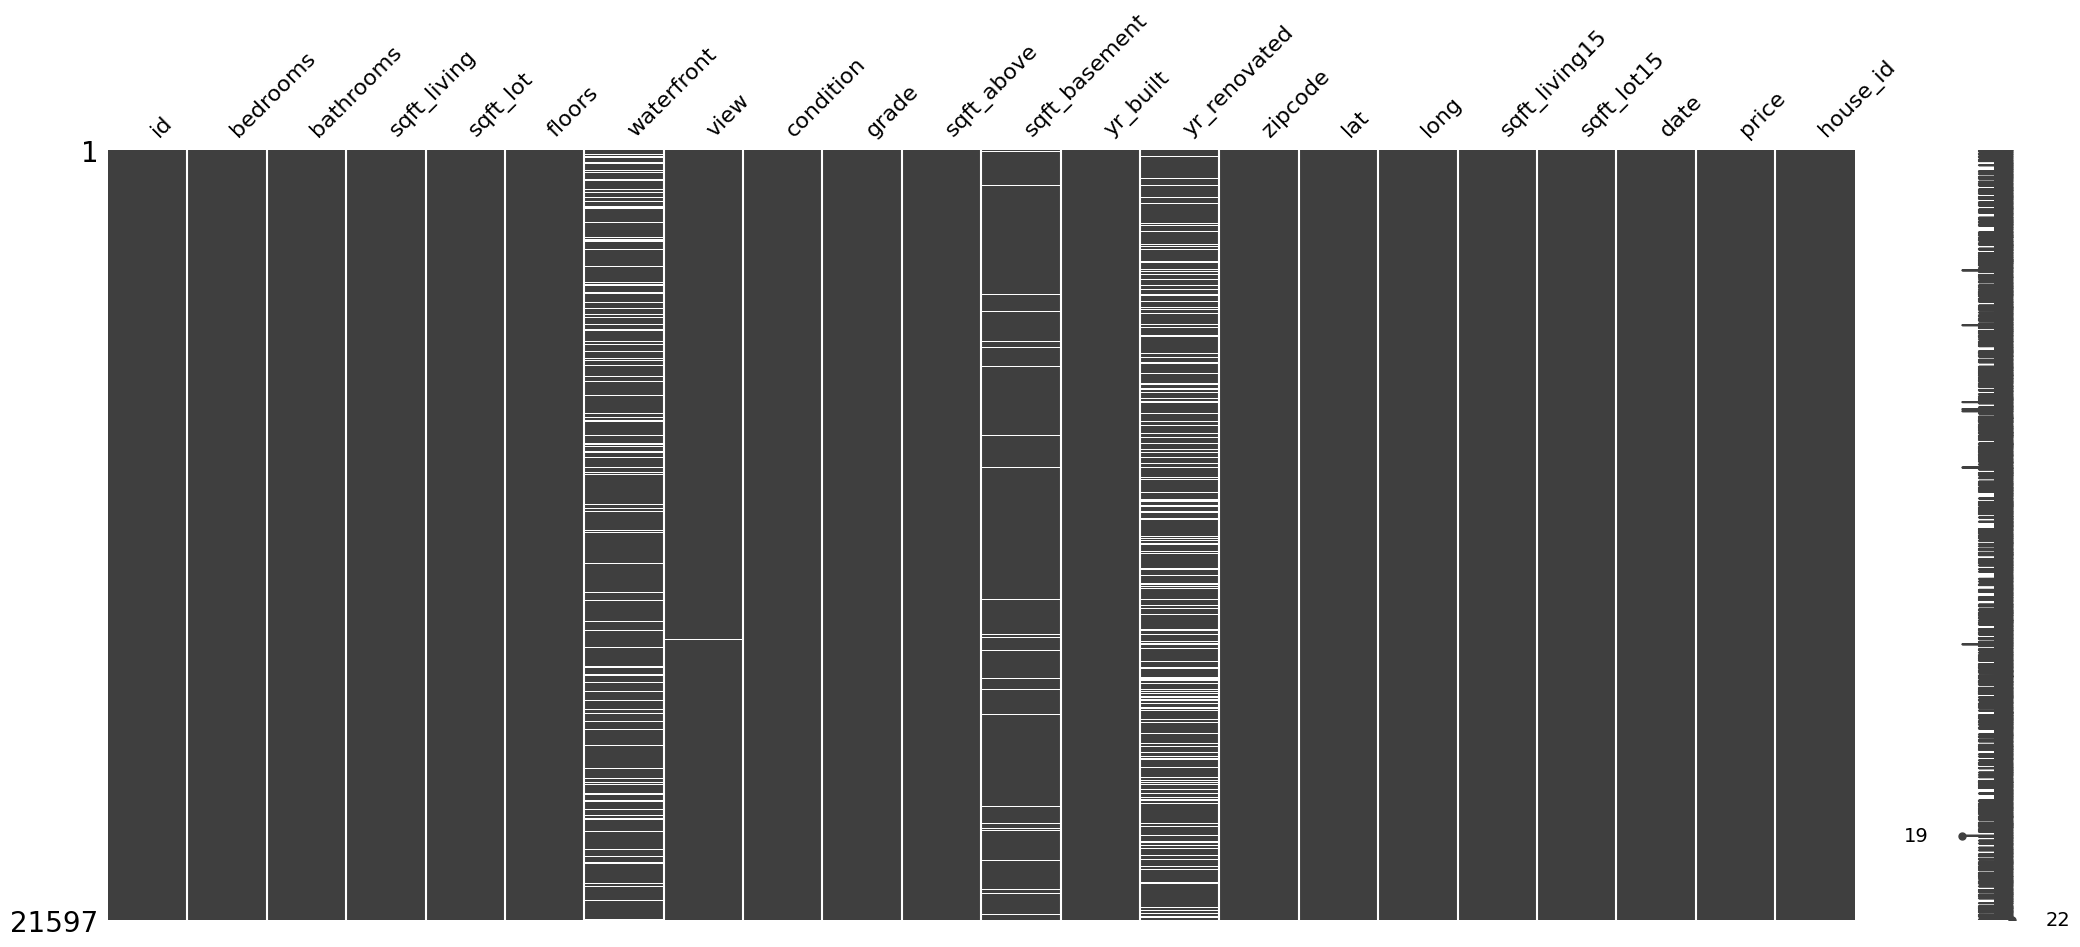

In [267]:
# check how many duplicated rows exist in the data frame
df_joined_table.duplicated().value_counts()

import missingno as msno
msno.matrix(df_joined_table)

df_joined_table.isna().sum()

#df_joined_table['view'].unique()

In [268]:
# check how many duplicated rows exist in the data frame
df_joined_table.duplicated().value_counts()
#--> No duplicates were found 

df_joined_table.dtypes
# --> data types mostly look good except:
'''
- waterfront is float64 should be bool 

- view is float64 should be bool ! should also be renamed, so it get clear that view means: has been viewed

- yr_renovated is float64 should be int

- date is object should be date (year, month, day)

- price is float, is ok but could be int; no one cares about pennies in these dimensions

'''

'\n- waterfront is float64 should be bool \n\n- view is float64 should be bool ! should also be renamed, so it get clear that view means: has been viewed\n\n- yr_renovated is float64 should be int\n\n- date is object should be date (year, month, day)\n\n- price is float, is ok but could be int; no one cares about pennies in these dimensions\n\n'

In [269]:
import math 
def conv_float_to_date(flt_val): 
    '''
    convert float to date for df_joined_table['yr_renovated']
    '''
    if math.isnan(flt_val): 
        return flt_val
    elif isinstance(flt_val, float): 
        flt_val = flt_val/10
        flt_val = int(flt_val)
        flt_val = pd.to_datetime(flt_val, format='%Y').year
        return flt_val


f = 20220.000 
y = conv_float_to_date(f)

print(y, type(y))

2022 <class 'int'>


In [270]:

# conversion a mentioned above
# Bool type values: waterfront, view
df_joined_table['waterfront'] = df_joined_table['waterfront'].replace(np.NaN,0)
df_joined_table['waterfront'] = df_joined_table['waterfront'].apply(lambda value: bool(value))

# date type objects: yr_built, yr_renovated, date
df_joined_table['date'] = pd.to_datetime(df_joined_table['date'], format='%Y-%m-%d')

# replace 0 by NaN
df_joined_table['yr_renovated'] = df_joined_table['yr_renovated'].replace(0,np.NaN)
df_joined_table['sqft_basement'] = df_joined_table['sqft_basement'].replace(0,np.NaN)

# Convert remaining years into date format first to int, then to date 
df_joined_table['yr_renovated'] = df_joined_table['yr_renovated'].apply(conv_float_to_date)

# Int type values: sqft_living, sqft_lot, sqft_living,  sqft_lot, floorssqft_lot15, sqft_living15, price
#
df_joined_table['view'] = df_joined_table['view'].replace(np.NaN,0)

int_cov_lst = [ 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living', 'sqft_lot', 'floors', 'sqft_lot15', 'sqft_living15', 'price', 'view']
for colnam in int_cov_lst: 
    df_joined_table[colnam] = df_joined_table[colnam].apply(lambda value: int(value))
#df_joined_table['view'] = df_joined_table['view'].apply(lambda value: bool(value))



df_joined_table.dtypes


id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                 bool
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
date             datetime64[ns]
price                     int64
house_id                  int64
dtype: object

<Axes: ylabel='Frequency'>

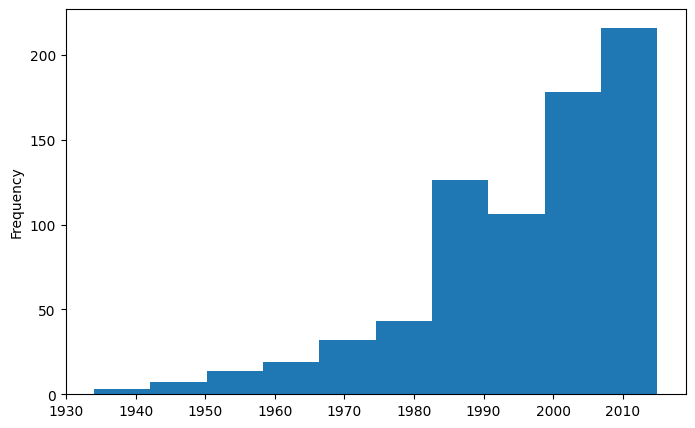

In [271]:
data = df_joined_table['yr_renovated']
data.plot(kind='hist')

<Axes: ylabel='Frequency'>

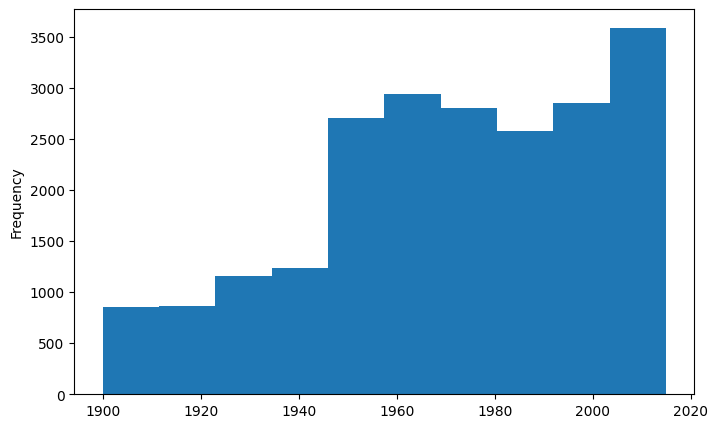

In [272]:
data = df_joined_table['yr_built']
data.plot(kind='hist')

0.6148539148955874

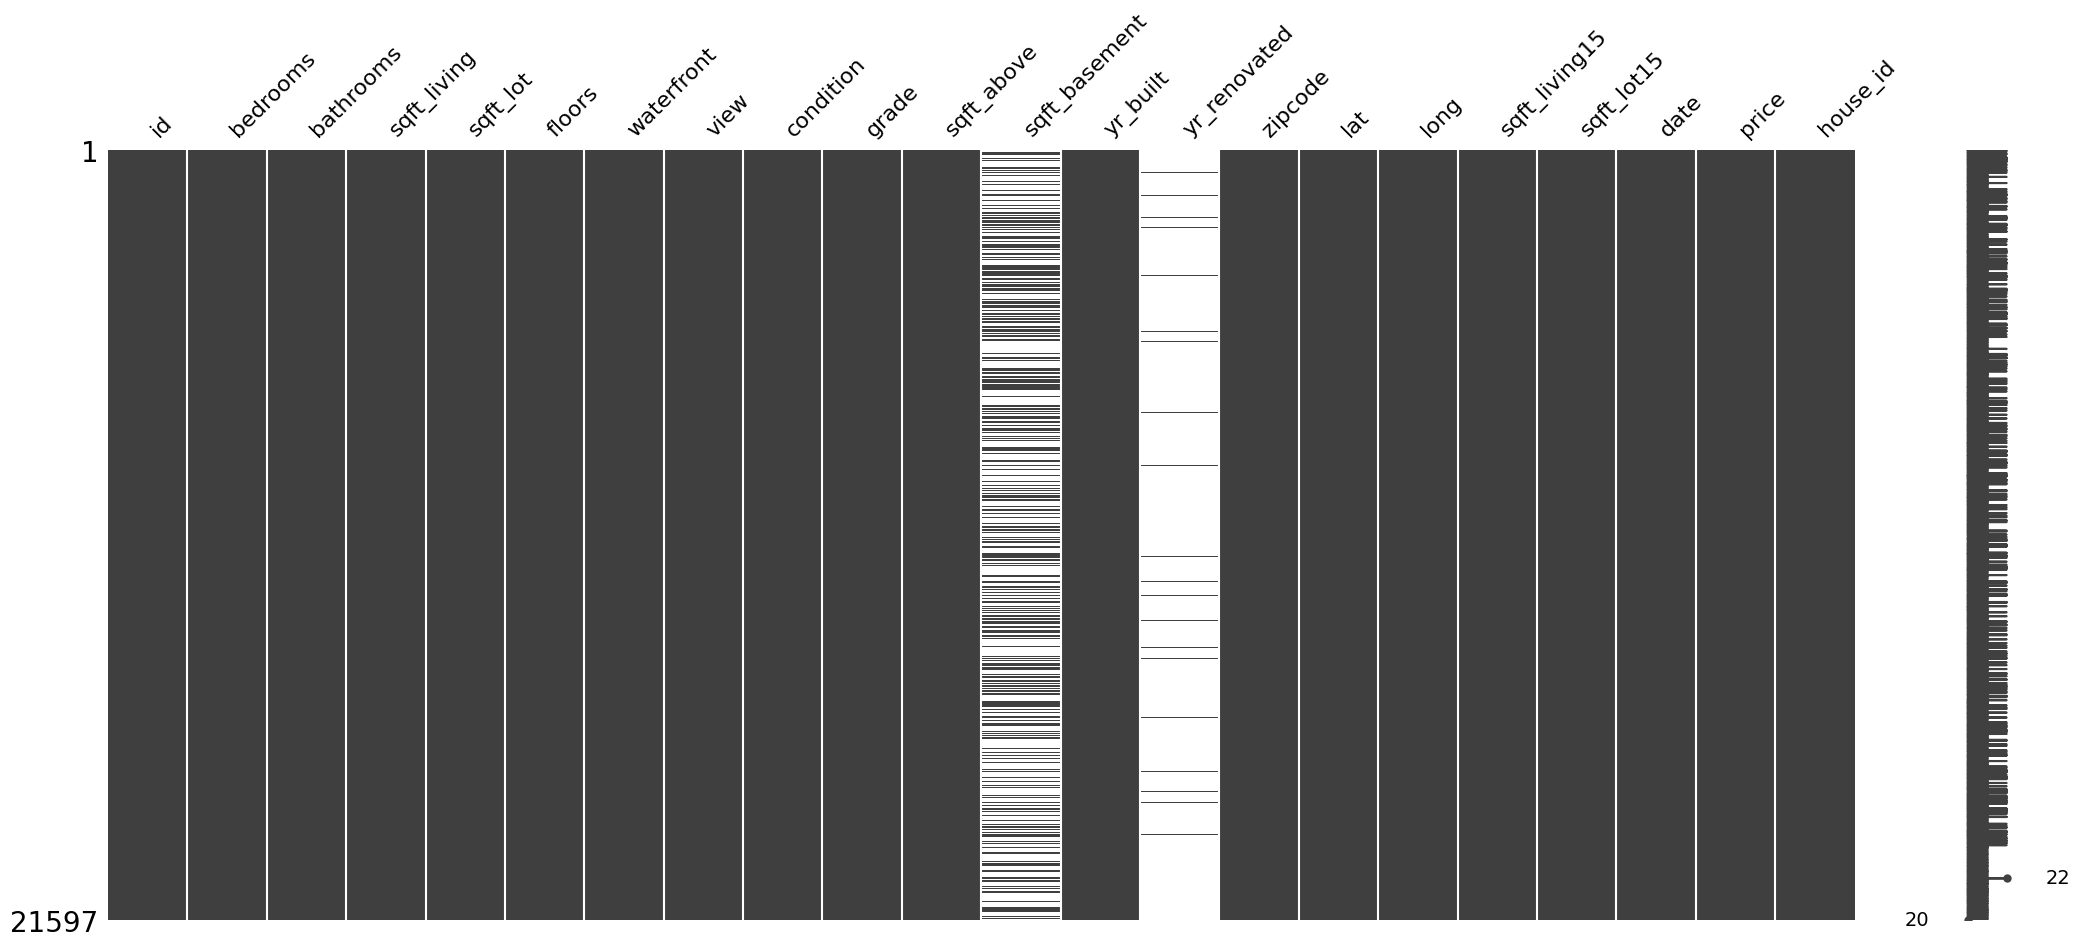

In [273]:
import missingno as msno
msno.matrix(df_joined_table)

df_joined_table.isna().sum()
# 20853 yr_renovated means these houses have not been renovated 
#13279 entries for sqft_basement  are nan/ missing --> assuming these houses have no basement 

13279/21597


## ____3 insights regarding the overall data. One should be geographical.

In [274]:
# Make the necessary imports
#import pandas as pd
#from ydata_profiling import ProfileReport

# Generate the report
#profile = ProfileReport(df_joined_table,title="Test Report")

# Save the report to .html
#profile.to_file("Test Report.html")

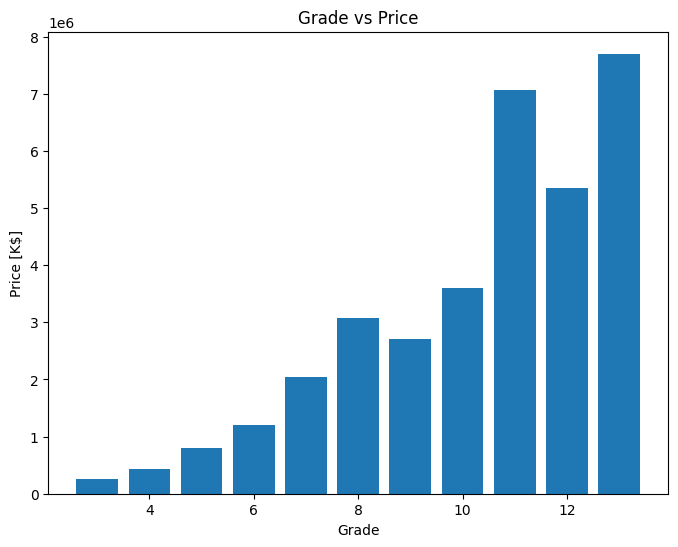

In [275]:
grades = df_joined_table['grade']
prices = df_joined_table['price']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(grades, prices)
plt.xlabel('Grade')
plt.ylabel('Price [K$]')
plt.title('Grade vs Price')
plt.show()

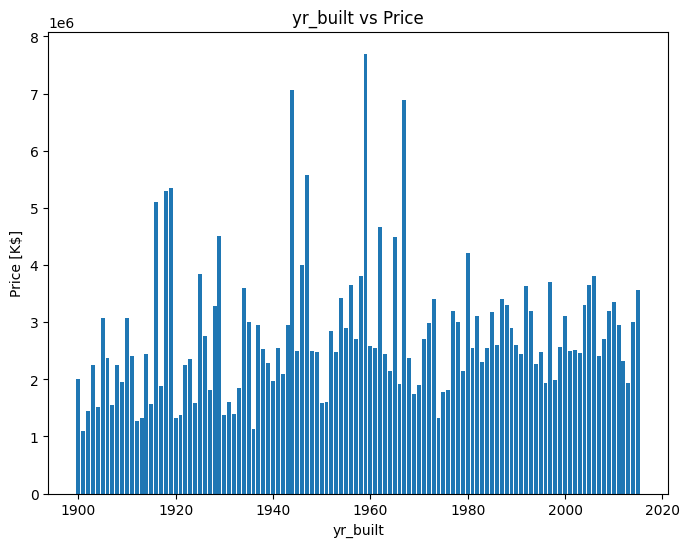

In [276]:
yr_built = df_joined_table['yr_built'].sort_values()
prices = df_joined_table['price']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(yr_built, prices)
plt.xlabel('yr_built')
plt.ylabel('Price [K$]')
plt.title('yr_built vs Price')
plt.show()

In [277]:
#sns.pairplot(df_joined_table)
#plt.show()

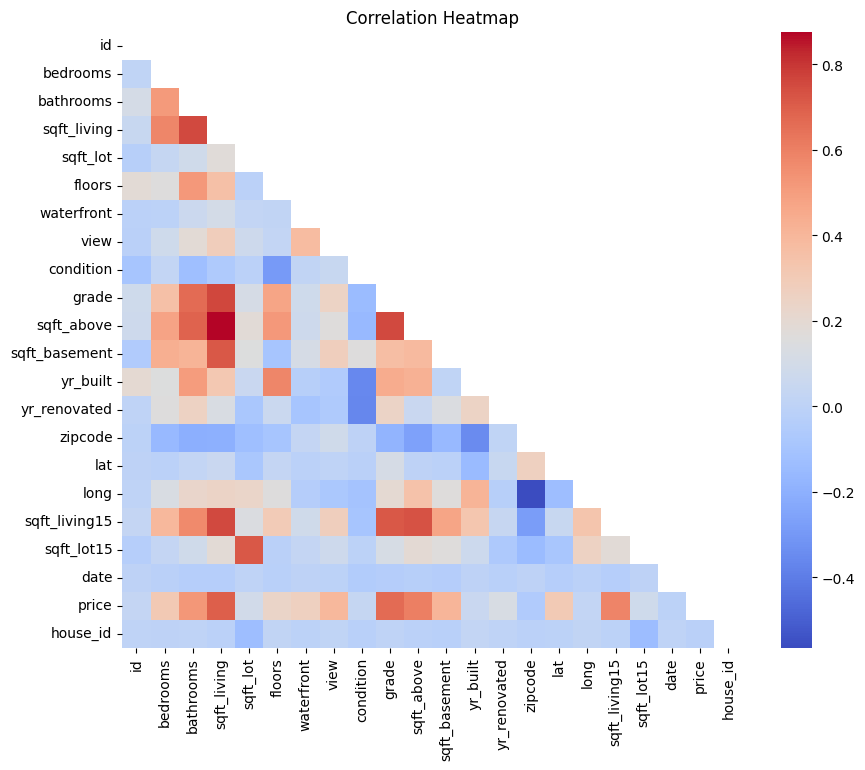

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df_joined_table.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

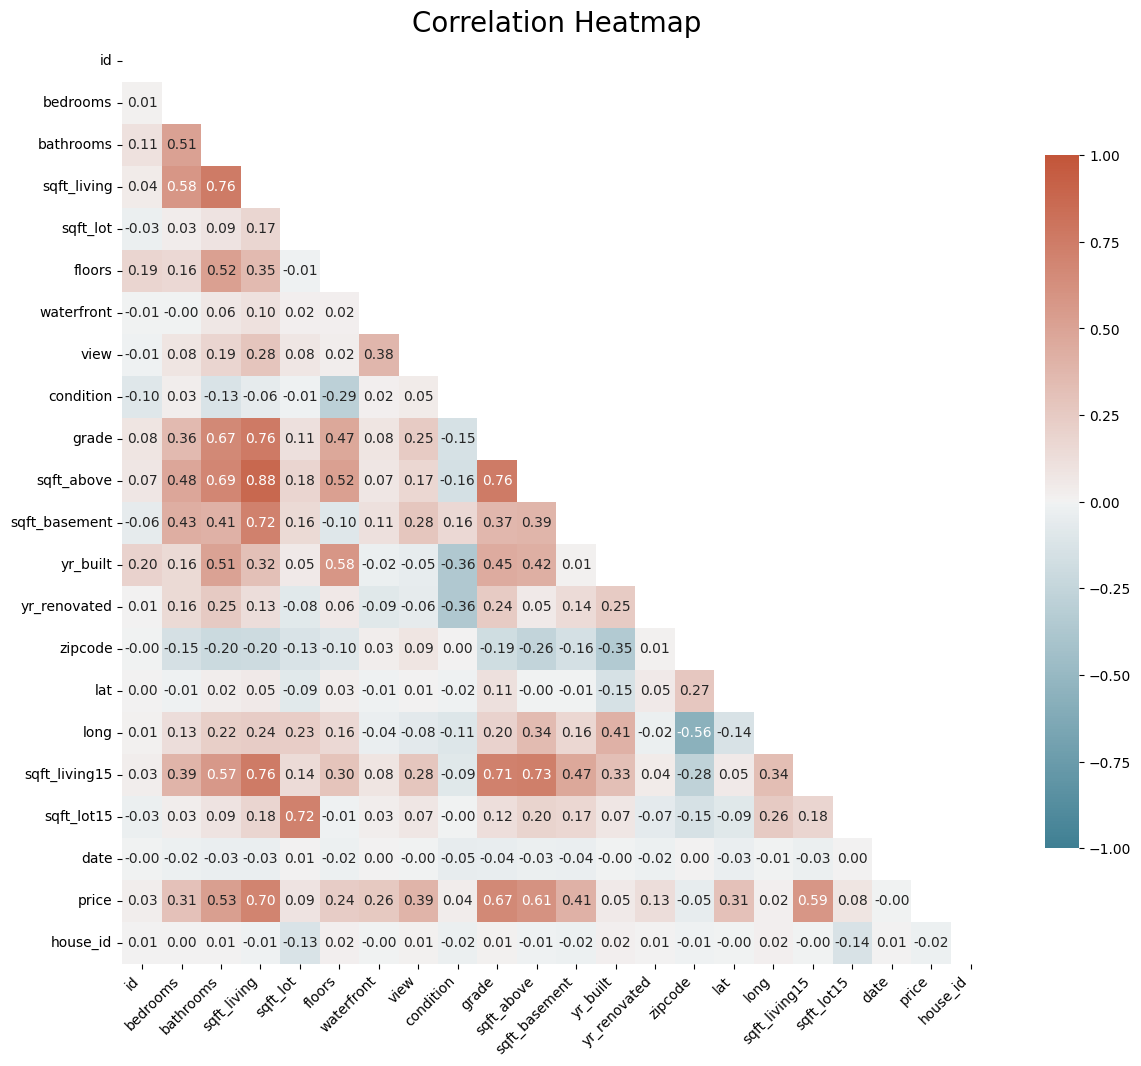

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_joined_table is already defined and contains your data
# Create a correlation matrix
corr_matrix = df_joined_table.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, 
                      vmin=-1, vmax=1, cbar_kws={"shrink": .75})

# Enhance the tick labels for better readability
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

plt.title("Correlation Heatmap", fontsize=20)
plt.show()


In [280]:
grouped = df_joined_table.groupby('zipcode').agg({'price': 'mean', 'grade': 'mean'}).reset_index()

## 3 Recommendation for Client

In [281]:
import pandas as pd
import plotly.express as px


# Create a Scattermapbox plot
fig = px.scatter_mapbox(df_joined_table,
                        lat='lat',
                        lon='long',
                        hover_name='id',
                        hover_data=['price'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=10,
                        height=300)

# Set your Mapbox access token here
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [282]:
# create a new df, grouped by zip code an mean of lat long for each zip with cols: Lat, Long, Zip 
# ==> Shows 'centers' for each zip code
df_zip_grouped = df_joined_table.groupby('zipcode')

df_zip_mean = df_zip_grouped[['lat','long','grade']].mean()

df_zip_mean = df_zip_mean.reset_index()



# Create a Scattermapbox plot
fig_mean_zip = px.scatter_mapbox(df_zip_mean,
                        lat='lat',
                        lon='long',
                        hover_name='zipcode',
                        color_discrete_sequence=["fuchsia"],
                        zoom=10,
                        height=600)
# Set your Mapbox access token here
fig_mean_zip.update_layout(mapbox_style="open-street-map")
fig_mean_zip.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_mean_zip.show()

In [283]:
#group by zipcode and count the entrys of houses, to have houses per zipcode

df_zip_grouped_density = df_joined_table.groupby('zipcode')

df_zip_grouped_density_counts = df_zip_grouped_density['zipcode'].value_counts()
df_zip_grouped_density_counts = df_zip_grouped_density_counts.reset_index()
df_zip_grouped_density_counts.head(10)
#Merge the center of the zip codes with the table of house densities
df_Zip_long_lat_count = df_zip_mean.merge(df_zip_grouped_density_counts)
df_Zip_long_lat_count.head(10)


,zipcode,lat,long,grade,count
0,98001,47.309,-122.271,7.296,361
1,98002,47.309,-122.213,6.693,199
2,98003,47.316,-122.310,7.543,280
3,98004,47.616,-122.205,8.688,317
4,98005,47.612,-122.167,8.488,168
5,98006,47.558,-122.147,8.795,498
6,98007,47.611,-122.142,7.965,141
7,98008,47.613,-122.116,7.654,283
8,98010,47.333,-121.999,7.400,100
9,98011,47.755,-122.201,7.774,195


In [284]:
#plot a density map

fig_mean_zip = px.scatter_mapbox(df_Zip_long_lat_count,
                                 lat='lat',
                                 lon='long',
                                 hover_name='zipcode',
                                 size='count',
                                 color='count',  # Updated this line to color points by density
                                 color_continuous_scale=px.colors.sequential.Plasma,  # Added a color scale
                                 zoom=10,
                                 height=600)

# Set your Mapbox access token here
fig_mean_zip.update_layout(mapbox_style="open-street-map")
fig_mean_zip.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_mean_zip.show()

In [285]:
# Filter the density list for counts under 200 -> Less populated area

df_Zip_long_lat_count_filtered = df_Zip_long_lat_count.query('count < 200')
   
#plot a density map

fig_mean_zip = px.scatter_mapbox(df_Zip_long_lat_count_filtered,
                                 lat='lat',
                                 lon='long',
                                 hover_name='zipcode',
                                 size='count',
                                 color='count',  # Updated this line to color points by density
                                 color_continuous_scale=px.colors.sequential.Plasma,  # Added a color scale
                                 zoom=10,
                                 height=600)

# Set your Mapbox access token here
fig_mean_zip.update_layout(mapbox_style="open-street-map")
fig_mean_zip.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_mean_zip.show()

In [286]:
# we have 18 remaining candidates
df_Zip_long_lat_count_filtered.shape

#Having looked at the map, we see that the following zip codes are in the outskirts and have a low house density: 
- 98011
- 98077 
- 98019 
- 98014
- 98024 
- 98010
- 98002
- 98070

-98070

In [287]:
zip_lst = [98011, 98077, 98019, 98014, 98024, 98010, 98002,98070]

df_raw_canidates = df_joined_table[df_joined_table['zipcode'].isin(zip_lst) ]
#maffiosi needs a basement
df_raw_canidates_with = df_raw_canidates[df_raw_canidates['sqft_basement'] >0 ]
#must be medium grade = average
df_canidates_average = df_raw_canidates_with.query('grade == 7 and condition == 3')

df_canidates_average =df_canidates_average.sort_values('price', ascending=True)

#get 3 canidates, lowest price 
df_final_canidates= df_canidates_average.head(3)


'''
## BUILDING GRADE
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r





## BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
'''

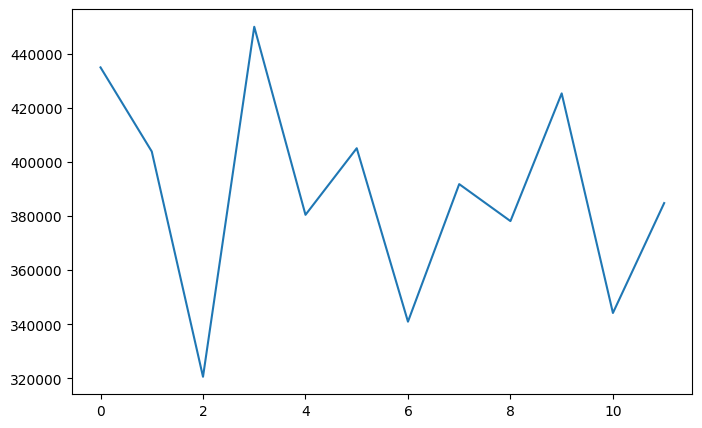

In [314]:
# price development of average houses over date 
# bin into 12, one for each month and show avg. price for each month

df_canidates_average['month'] = pd.to_datetime(df_canidates_average['date']).dt.month

df_canidates_average_month = df_canidates_average.groupby('month')
df_canidates_average_month_mean = df_canidates_average_month['price'].mean()


df_canidates_average_month_mean = df_canidates_average_month_mean.reset_index()


month_price_plt = df_canidates_average_month_mean['price'].plot()

#--> Buy average house in February

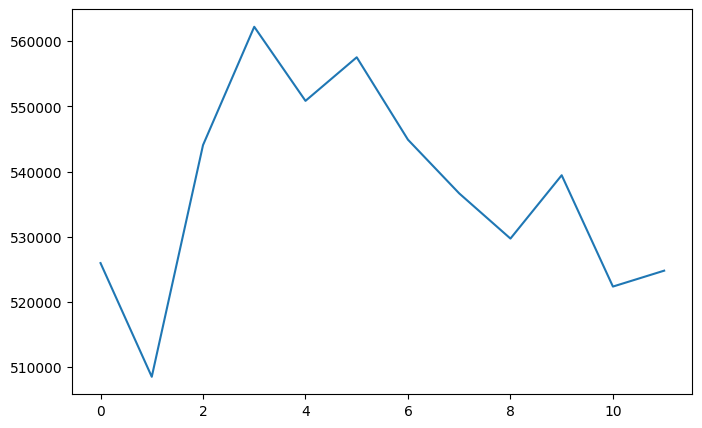

In [315]:
# Price development all houses
df_joined_table['month'] = pd.to_datetime(df_joined_table['date']).dt.month

df_joined_table_month = df_joined_table.groupby('month')
df_joined_table_month_mean = df_joined_table_month['price'].mean()


df_joined_table_month_mean = df_joined_table_month_mean.reset_index()


month_price_plt = df_joined_table_month_mean['price'].plot()

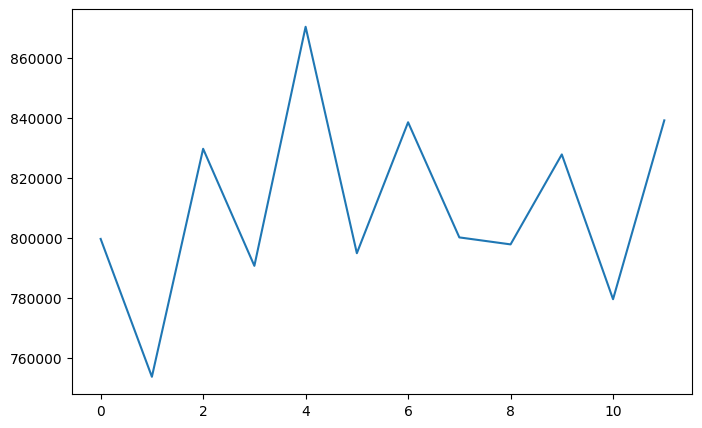

In [317]:

df_top_10_center['month'] = pd.to_datetime(df_top_10_center['date']).dt.month

df_top_10_center_month = df_top_10_center.groupby('month')
df_top_10_center_month_mean = df_top_10_center_month['price'].mean()


df_top_10_center_month_mean = df_top_10_center_month_mean.reset_index()


month_price_plt = df_top_10_center_month_mean['price'].plot()

In [290]:
#show top 3 choices

fig_mean_zip = px.scatter_mapbox(df_final_canidates,
                                 lat='lat',
                                 lon='long',
                                 hover_name='zipcode',
                                 zoom=10,
                                 height=600)


# Set your Mapbox access token here
fig_mean_zip.update_layout(mapbox_style="open-street-map")
fig_mean_zip.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_mean_zip.show()

In [291]:
# Top 10% Central houses


#central Buisness district of Seattle is 
#
# 47.608433126484584, -122.2970951858066
geographic_centroid_lat = 47.608433126484584, -122.2970951858066


from geopy.distance import geodesic



def dist_to_center (lat, long):
    '''
    !!!!
    Needs installation of geopy
    !!!!
    geographic_centroid_lat= 47.608433126484584,-122.2970951858066
    geographic_centroid_long= -122.2970951858066
    #lat = Breitengrad 
    #long  = Längengrad 
    '''
    gc= (47.60843312648, -122.297095185)
    target = (lat, long)
    distance = geodesic(gc, target).kilometers
    return distance





In [310]:
df_joined_table['distance_to_center'] = df_joined_table.apply(lambda row: dist_to_center(row['lat'], row['long']), axis=1)
df_joined_table_center = df_joined_table.sort_values('distance_to_center', ascending= True)

In [313]:
#calc how much 10% of rows our DF is
df_rows = int(round(len(df_joined_table_center)*0.1))
#apply the number of rows we need to the table (which was sorted by distance to the center)
df_top_10_center = df_joined_table_center.head(df_rows)

df_top_10_center

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,month,distance_to_center,squared_distance
18617,18618,4,2.750,2460,3600,2,False,0,3,8,...,47.609,-122.297,1890,3600,2015-04-16,710000,7960100220,4,0.097,0.000
7225,7226,4,2.000,1240,3000,1,False,0,3,7,...,47.608,-122.298,1480,3500,2014-06-16,375000,1211000185,6,0.115,0.000
17817,17818,3,2.250,1480,5400,2,False,0,4,8,...,47.609,-122.296,1280,3600,2014-06-12,600000,7960100120,6,0.144,0.000
3983,3984,1,1.000,590,833,1,False,0,4,7,...,47.608,-122.299,780,1617,2014-07-01,202000,6840700165,7,0.146,0.000
5856,5857,2,1.000,750,4500,1,False,0,3,6,...,47.607,-122.297,1540,4000,2015-05-04,295000,1211000280,5,0.159,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,3817,3,1.750,1360,4998,1,False,0,3,8,...,47.547,-122.302,1350,4998,2015-04-21,445000,3942900115,4,6.840,0.004
18039,18040,2,1.750,1240,4120,1,False,0,4,7,...,47.669,-122.314,1640,3740,2015-04-01,540000,8714600145,4,6.842,0.004
18705,18706,2,1.000,920,5157,1,False,0,3,6,...,47.550,-122.269,1700,5150,2015-02-18,475000,4109600306,2,6.842,0.004
10378,10379,3,2.000,1760,5488,1,False,0,3,7,...,47.648,-122.367,1760,5943,2015-03-09,750000,7015200800,3,6.845,0.006
